# NoteBook for the application track in REINFORCMENT LEARNING A2024

Last Names : Bosle, Kaddour, Le Blanc

First Names : Elie, Marwan, Raphaël

In [1]:
#Libraries used

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import of the class for the tabular Monte-Carlo method

from Trains_tabular import Environnment

#Import of the classe for the DQN method

from Trains_gym import TrainEnv


# 1. Function Approximation - DQN
## 1.0 How is the data defined ?

In [3]:
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from tqdm import tqdm

In [4]:
print("Begin Initialisation...")
env = TrainEnv("instances/Asmall.json")
env.list_it.head()

Begin Initialisation...


Initialize Progress: 100%|██████████| 9/9 [00:00<00:00, 370.95it/s]

{1: 443, 9: 443, 4: 443, 5: 443, 8: 443, 11: 443, 12: 443, 15: 443, 17: 443} dans init


,id,sensDepart,voieEnLigne,voieAQuai
0,0,1,MAN,Z
1,1,0,V1_S,Z
2,2,1,V1_S,Z
3,3,0,V2_S,Z
4,4,1,V2_S,Z


The itineraries are Dataframes giving the direction (**sensDepart** = 1 if departure), the mainline track (**voieEnLigne**) and the platform track (**voieAQuai**). Lets see what the trains ressemble to.

In [5]:
env.trains.head()

,id,sensDepart,voieEnLigne,voieAQuai,typeCirculation,dateHeure,typesMateriels
0,1,1,V2_N,V2,FRET,2021-03-30T20:35,[1]
1,9,1,VU2_S,11,TER,2021-03-30T21:36,[0]
2,4,1,V1_S,V1,TECH,2021-03-30T20:43,[0]
3,5,0,V1_N,V1,TGV,2021-03-30T21:00:30,[0]
4,8,1,V2_N,V2,FRET,2021-03-30T21:14,[1]


The trains are Dataframes giving the direction (**sensDepart** = 1 if departure), the mainline track (**voieEnLigne**) and the pre-assigned platform track (**voieAQuai**), the circulation type (**typeCirculation**), the time of arrival or departure (**dateHeure**) and the materials types (**typesMaterials**). Now, the constrains.

The constrains (id train column 0 with id itinerary column 1 and the other id train column 2 with id itinerary column 3 cause the penality column 4)

In [7]:
env.contraintes.head()

,0,1,2,3,4
0,4,290,9,294,10000
1,4,184,9,188,10000
2,4,228,9,232,10000
3,4,23,9,26,10000
4,4,23,9,5,10000


The trains are Dataframes. The id train **column 0** with id itinerary **column 1** and the other id train **column 2** with id itinerary **column 3** cause the penality **column 4**. In practise we will devide that penality by 1000.

Now let's run the DQN simulation in each instance (we decide to not run the instance PE since it is too large and doesn't give satisfying results).

## 1.1 Asmall

Training Progress: 100%|██████████| 200/200 [00:30<00:00,  6.66it/s]


Best cost:  0.0
Best configuration:  [219, 232, 184, 256, 41, 297, 156, 29, 138]


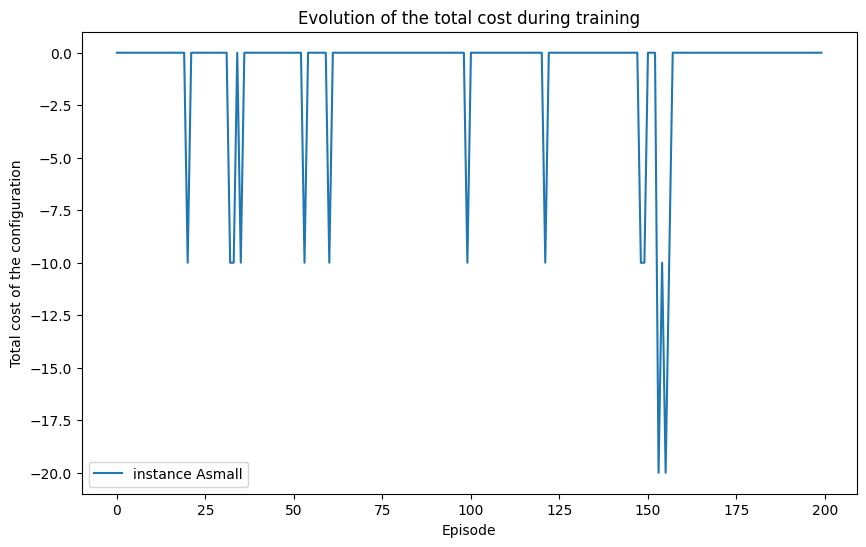

In [ ]:
# Step 1: Vectorize the environment
vec_env = DummyVecEnv([lambda: env])

# Step 2: Create and train the DQN model
model = DQN("MlpPolicy", vec_env, verbose=0, learning_rate=1e-3, buffer_size=800, target_update_interval=100)
number_of_episodes = 200
max_number_of_steps = env.number_of_trains
# Tracking cumulative rewards
episode_cost = [] # List to store total cost per episode
track_number_of_steps = []
Itineraires = []
max = -1e5  # Best cost
# Progress bar
with tqdm(total=number_of_episodes, desc="Training Progress") as pbar:
    for _ in range(number_of_episodes):
        # Simulate environment to track cumulative rewards
        obs = vec_env.reset()  # Reset the environment
        done = False
        cumulative_reward2 = 0
        number_of_steps = 0
        while not done and number_of_steps<max_number_of_steps:
            model.learn(total_timesteps=1, reset_num_timesteps=False)
            number_of_steps += 1
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = vec_env.step(action)
        if info[0]['cost_config'] > max:  # Update if this episode cost is the best from the beginning of the training
            max = info[0]['cost_config']
            itinary = info[0]['itineraire']
        episode_cost.append(info[0]['cost_config'])
        pbar.update(1)
print('Best cost: ',max)
print('Best configuration: ', itinary)

# Plot the evolution of expected return
plt.figure(figsize=(10, 6))
plt.plot(episode_cost, label=f"instance Asmall")
plt.xlabel("Episode")
plt.ylabel("Total cost of the configuration")
plt.title("Evolution of the total cost during training")
plt.legend()
plt.show()

## 1.2 Inst_A

Begin Initialisation...


Initialize Progress: 100%|██████████| 46/46 [00:00<00:00, 546.37it/s]


{0: 443, 3: 443, 4: 443, 7: 443, 9: 443, 10: 443, 12: 443, 14: 443, 20: 443, 24: 443, 18: 443, 19: 443, 23: 443, 25: 443, 28: 443, 29: 443, 36: 443, 43: 443, 33: 443, 37: 443, 41: 443, 39: 443, 42: 443, 46: 443, 48: 443, 50: 443, 54: 443, 56: 443, 60: 443, 61: 443, 62: 443, 69: 443, 68: 443, 70: 443, 72: 443, 73: 443, 74: 443, 77: 443, 80: 443, 81: 443, 84: 443, 86: 443, 88: 443, 91: 443, 92: 443, 95: 443} dans init
Done.


Training Progress: 100%|██████████| 200/200 [02:35<00:00,  1.29it/s]


Best cost:  0.0
Best configuration:  [44, 31, 72, 53, 29, 244, 31, 31, 424, 243, 86, 425, 53, 44, 53, 44, 126, 110, 44, 187, 416, 56, 425, 16, 18, 81, 256, 374, 187, 256, 106, 370, 184, 187, 364, 44, 159, 231, 425, 14, 129, 29, 56, 255, 364, 110]


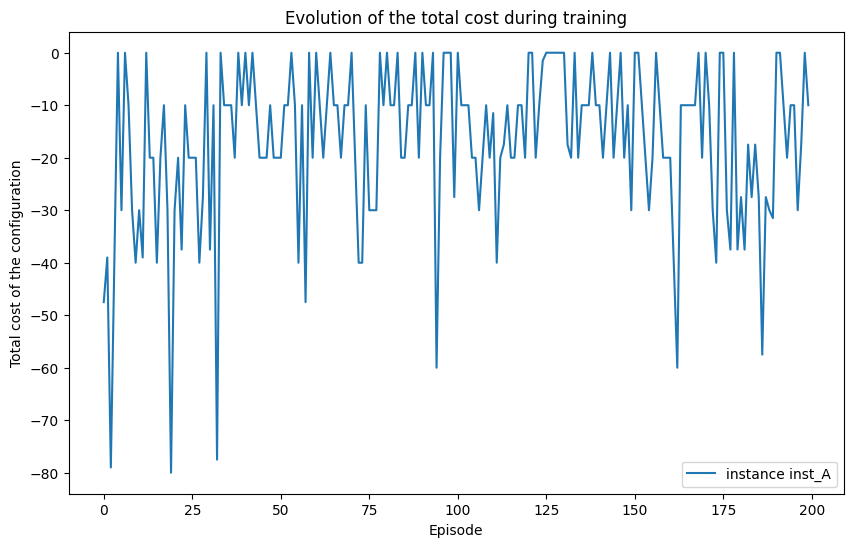

In [11]:
print("Begin Initialisation...")
env = TrainEnv("instances/inst_A.json")
print("Done.")

# Step 1: Vectorize the environment
vec_env = DummyVecEnv([lambda: env])

# Step 2: Create and train the DQN model
model = DQN("MlpPolicy", vec_env, verbose=0, learning_rate=1e-3, buffer_size=800, target_update_interval=100)
number_of_episodes = 200
max_number_of_steps = env.number_of_trains
# Tracking cumulative rewards
episode_cost = [] # List to store total cost per episode
track_number_of_steps = []
Itineraires = []
max = -1e5  # Best cost
# Progress bar
with tqdm(total=number_of_episodes, desc="Training Progress") as pbar:
    for _ in range(number_of_episodes):
        # Simulate environment to track cumulative rewards
        obs = vec_env.reset()  # Reset the environment
        done = False
        cumulative_reward2 = 0
        number_of_steps = 0
        while not done and number_of_steps<max_number_of_steps:
            model.learn(total_timesteps=1, reset_num_timesteps=False)
            number_of_steps += 1
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = vec_env.step(action)
        if info[0]['cost_config'] > max:  # Update if this episode cost is the best from the beginning of the training
            max = info[0]['cost_config']
            itinary = info[0]['itineraire']
        episode_cost.append(info[0]['cost_config'])
        pbar.update(1)
print('Best cost: ',max)
print('Best configuration: ', itinary)

# Plot the evolution of expected return
plt.figure(figsize=(10, 6))
plt.plot(episode_cost, label=f"instance inst_A")
plt.xlabel("Episode")
plt.ylabel("Total cost of the configuration")
plt.title("Evolution of the total cost during training")
plt.legend()
plt.show()

## 1.3 Inst_NS

Begin Initialisation...


Initialize Progress: 100%|██████████| 343/343 [00:39<00:00,  8.65it/s]


{0: 935, 7: 935, 8: 935, 15: 935, 26: 935, 32: 935, 1: 935, 3: 935, 5: 935, 13: 935, 9: 935, 11: 935, 16: 935, 57: 935, 18: 935, 20: 935, 22: 935, 24: 935, 25: 935, 73: 935, 28: 935, 29: 935, 37: 935, 30: 935, 48: 935, 35: 935, 41: 935, 40: 935, 43: 935, 53: 935, 78: 935, 77: 935, 50: 935, 52: 935, 66: 935, 56: 935, 84: 935, 70: 935, 62: 935, 74: 935, 67: 935, 69: 935, 81: 935, 87: 935, 96: 935, 79: 935, 82: 935, 83: 935, 99: 935, 89: 935, 91: 935, 92: 935, 93: 935, 102: 935, 111: 935, 107: 935, 104: 935, 112: 935, 108: 935, 109: 935, 124: 935, 113: 935, 130: 935, 131: 935, 133: 935, 119: 935, 122: 935, 126: 935, 128: 935, 129: 935, 132: 935, 134: 935, 146: 935, 135: 935, 156: 935, 141: 935, 176: 935, 140: 935, 153: 935, 184: 935, 154: 935, 152: 935, 166: 935, 159: 935, 167: 935, 182: 935, 162: 935, 189: 935, 175: 935, 197: 935, 183: 935, 170: 935, 171: 935, 172: 935, 174: 935, 185: 935, 180: 935, 192: 935, 188: 935, 193: 935, 191: 935, 194: 935, 196: 935, 200: 935, 203: 935, 204: 935,

Training Progress: 100%|██████████| 200/200 [20:03<00:00,  6.02s/it]


Best cost:  -111.86
Best configuration:  [464, 919, 432, 454, 472, 397, 41, 41, 465, 403, 16, 441, 16, 391, 643, 868, 18, 1, 16, 406, 19, 42, 452, 1, 410, 933, 39, 18, 19, 436, 891, 406, 17, 280, 458, 631, 391, 416, 15, 468, 352, 17, 426, 406, 428, 35, 42, 19, 410, 42, 541, 871, 429, 265, 406, 919, 49, 921, 33, 17, 463, 888, 460, 452, 151, 460, 475, 451, 49, 24, 18, 44, 462, 2, 409, 891, 403, 38, 128, 430, 631, 35, 899, 47, 542, 919, 24, 406, 921, 388, 60, 17, 35, 40, 468, 594, 49, 504, 4, 468, 26, 890, 451, 24, 17, 49, 461, 47, 35, 406, 49, 921, 406, 435, 441, 49, 553, 911, 436, 47, 870, 457, 465, 27, 274, 16, 49, 41, 541, 27, 19, 214, 436, 19, 460, 461, 18, 468, 143, 17, 129, 429, 17, 42, 891, 192, 552, 421, 436, 436, 30, 280, 27, 870, 391, 16, 468, 16, 461, 933, 410, 899, 19, 435, 35, 19, 42, 468, 39, 933, 24, 44, 877, 42, 35, 435, 16, 467, 413, 16, 49, 397, 451, 899, 322, 472, 891, 15, 468, 35, 1, 410, 406, 403, 410, 522, 49, 429, 429, 17, 24, 17, 49, 420, 911, 18, 18, 895, 499, 18

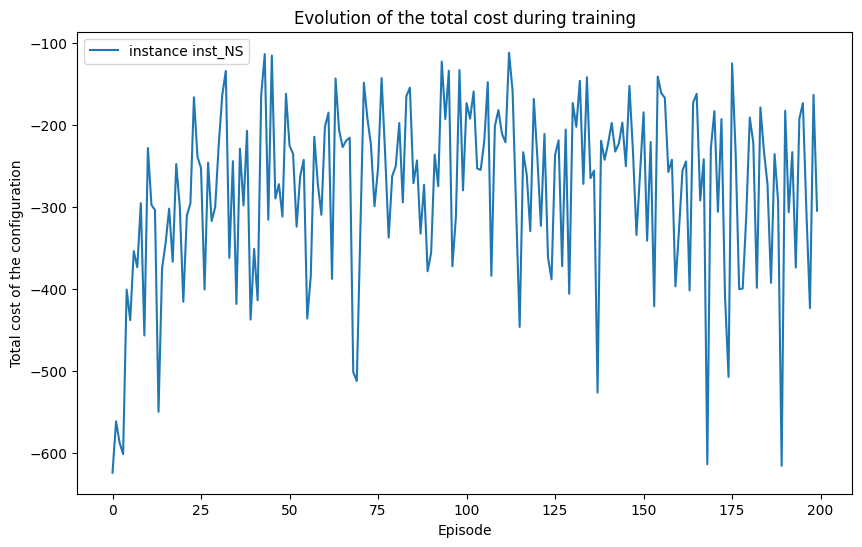

In [13]:
print("Begin Initialisation...")
env = TrainEnv("instances/inst_NS.json")
print("Done.")

# Step 1: Vectorize the environment
vec_env = DummyVecEnv([lambda: env])

# Step 2: Create and train the DQN model
model = DQN("MlpPolicy", vec_env, verbose=0, learning_rate=1e-3, buffer_size=800, target_update_interval=100)
number_of_episodes = 200
max_number_of_steps = env.number_of_trains
# Tracking cumulative rewards
episode_cost = [] # List to store total cost per episode
track_number_of_steps = []
Itineraires = []
max = -1e5  # Best cost
# Progress bar
with tqdm(total=number_of_episodes, desc="Training Progress") as pbar:
    for _ in range(number_of_episodes):
        # Simulate environment to track cumulative rewards
        obs = vec_env.reset()  # Reset the environment
        done = False
        cumulative_reward2 = 0
        number_of_steps = 0
        while not done and number_of_steps<max_number_of_steps:
            model.learn(total_timesteps=1, reset_num_timesteps=False)
            number_of_steps += 1
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = vec_env.step(action)
        if info[0]['cost_config'] > max:  # Update if this episode cost is the best from the beginning of the training
            max = info[0]['cost_config']
            itinary = info[0]['itineraire']
        episode_cost.append(info[0]['cost_config'])
        pbar.update(1)
print('Best cost: ',max)
print('Best configuration: ', itinary)

# Plot the evolution of expected return
plt.figure(figsize=(10, 6))
plt.plot(episode_cost, label=f"instance inst_NS")
plt.xlabel("Episode")
plt.ylabel("Total cost of the configuration")
plt.title("Evolution of the total cost during training")
plt.legend()
plt.show()

## 1.4 Inst_PMP

Begin Initialisation...


Initialize Progress: 100%|██████████| 315/315 [00:53<00:00,  5.90it/s]


{0: 570, 2: 570, 16: 570, 19: 570, 24: 570, 33: 570, 34: 570, 35: 570, 42: 570, 44: 570, 45: 570, 51: 570, 82: 570, 88: 570, 74: 570, 7: 570, 5: 570, 6: 570, 9: 570, 15: 570, 28: 570, 17: 570, 20: 570, 21: 570, 25: 570, 27: 570, 48: 570, 31: 570, 32: 570, 58: 570, 57: 570, 61: 570, 43: 570, 46: 570, 62: 570, 52: 570, 71: 570, 68: 570, 59: 570, 60: 570, 64: 570, 100: 570, 66: 570, 67: 570, 79: 570, 70: 570, 83: 570, 76: 570, 77: 570, 78: 570, 80: 570, 81: 570, 85: 570, 101: 570, 89: 570, 114: 570, 104: 570, 96: 570, 112: 570, 98: 570, 99: 570, 119: 570, 103: 570, 167: 570, 107: 570, 109: 570, 111: 570, 115: 570, 117: 570, 123: 570, 124: 570, 132: 570, 180: 570, 127: 570, 145: 570, 158: 570, 153: 570, 160: 570, 141: 570, 166: 570, 195: 570, 161: 570, 171: 570, 148: 570, 151: 570, 163: 570, 219: 570, 159: 570, 162: 570, 182: 570, 188: 570, 170: 570, 172: 570, 203: 570, 201: 570, 175: 570, 177: 570, 218: 570, 179: 570, 181: 570, 202: 570, 186: 570, 185: 570, 190: 570, 208: 570, 222: 570, 3

Training Progress: 100%|██████████| 500/500 [11:57<00:00,  1.43s/it]

Best cost:  -30.93
Best configuration:  [114, 221, 221, 219, 567, 114, 221, 219, 1, 543, 568, 0, 21, 1, 32, 9, 487, 333, 519, 533, 104, 338, 340, 451, 434, 434, 18, 337, 385, 32, 562, 545, 337, 434, 221, 338, 50, 232, 374, 337, 294, 244, 329, 500, 221, 374, 7, 329, 376, 284, 279, 502, 315, 248, 284, 145, 116, 337, 131, 284, 374, 17, 279, 157, 337, 340, 301, 310, 500, 337, 279, 502, 28, 502, 247, 247, 221, 232, 502, 562, 32, 216, 121, 274, 284, 7, 103, 336, 277, 247, 123, 337, 274, 9, 247, 502, 274, 32, 337, 284, 12, 285, 500, 313, 562, 244, 93, 221, 502, 12, 123, 0, 487, 519, 337, 126, 231, 562, 313, 12, 374, 329, 519, 502, 502, 0, 21, 32, 323, 32, 85, 374, 329, 353, 12, 274, 21, 221, 505, 32, 252, 252, 249, 221, 32, 95, 246, 502, 221, 502, 358, 502, 313, 217, 533, 330, 513, 69, 539, 337, 274, 566, 221, 502, 502, 313, 221, 505, 279, 533, 221, 95, 12, 284, 32, 32, 313, 313, 32, 32, 313, 193, 274, 309, 337, 536, 313, 374, 372, 12, 274, 252, 500, 209, 340, 505, 337, 221, 481, 502, 313, 12

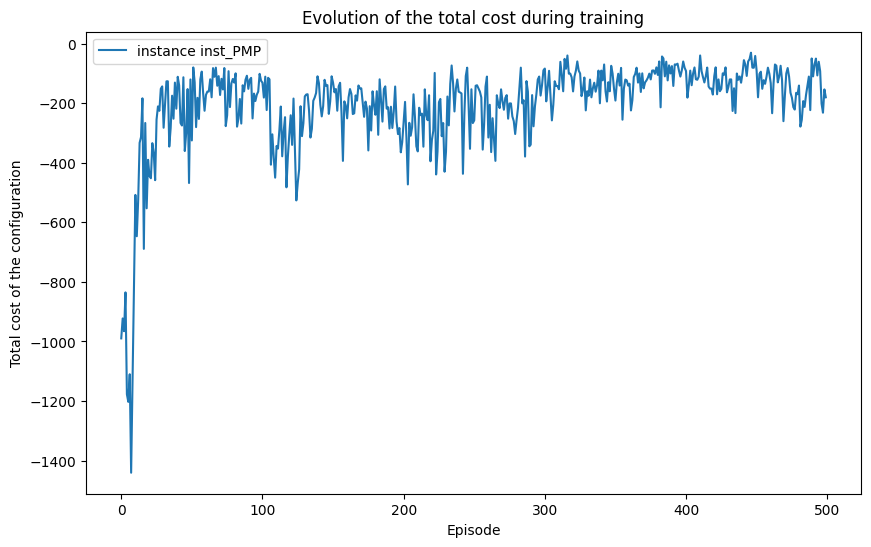

In [14]:
print("Begin Initialisation...")
env = TrainEnv("instances/inst_PMP.json")
print("Done.")

# Step 1: Vectorize the environment
vec_env = DummyVecEnv([lambda: env])

# Step 2: Create and train the DQN model
model = DQN("MlpPolicy", vec_env, verbose=0, learning_rate=1e-3, buffer_size=800, target_update_interval=100)
number_of_episodes = 500
max_number_of_steps = env.number_of_trains
# Tracking cumulative rewards
episode_cost = [] # List to store total cost per episode
track_number_of_steps = []
Itineraires = []
max = -1e5  # Best cost
# Progress bar
with tqdm(total=number_of_episodes, desc="Training Progress") as pbar:
    for _ in range(number_of_episodes):
        # Simulate environment to track cumulative rewards
        obs = vec_env.reset()  # Reset the environment
        done = False
        cumulative_reward2 = 0
        number_of_steps = 0
        while not done and number_of_steps<max_number_of_steps:
            model.learn(total_timesteps=1, reset_num_timesteps=False)
            number_of_steps += 1
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = vec_env.step(action)
        if info[0]['cost_config'] > max:  # Update if this episode cost is the best from the beginning of the training
            max = info[0]['cost_config']
            itinary = info[0]['itineraire']
        episode_cost.append(info[0]['cost_config'])
        pbar.update(1)
print('Best cost: ',max)
print('Best configuration: ', itinary)

# Plot the evolution of expected return
plt.figure(figsize=(10, 6))
plt.plot(episode_cost, label=f"instance inst_PMP")
plt.xlabel("Episode")
plt.ylabel("Total cost of the configuration")
plt.title("Evolution of the total cost during training")
plt.legend()
plt.show()

# 2. Tabular case 
## 2.1 Asmall

In [3]:
env_small = Environnment('instances/Asmall.json')
env_small.print_env()



   id  sensDepart voieEnLigne voieAQuai typeCirculation            dateHeure  \
0   1           1        V2_N        V2            FRET     2021-03-30T20:35   
1   9           1       VU2_S        11             TER     2021-03-30T21:36   
2   4           1        V1_S        V1            TECH     2021-03-30T20:43   
3   5           0        V1_N        V1             TGV  2021-03-30T21:00:30   
4   8           1        V2_N        V2            FRET     2021-03-30T21:14   

  typesMateriels  
0            [1]  
1            [0]  
2            [0]  
3            [0]  
4            [1]  
0     1
1     9
2     4
3     5
4     8
5    11
6    12
7    15
8    17
Name: id, dtype: int64
the state space (les id des trains) None


Maximum cost: -0.0
The Train 1 is associated with the itinerary 11
The Train 9 is associated with the itinerary 5
The Train 4 is associated with the itinerary 53
The Train 5 is associated with the itinerary 65
The Train 8 is associated with the itinerary 60
The Train 11 is associated with the itinerary 11
The Train 12 is associated with the itinerary 3
The Train 15 is associated with the itinerary 11
The Train 17 is associated with the itinerary 11


/var/folders/br/9496lc214557xl6c9pv6n2qr0000gn/T/ipykernel_47547/1428914699.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


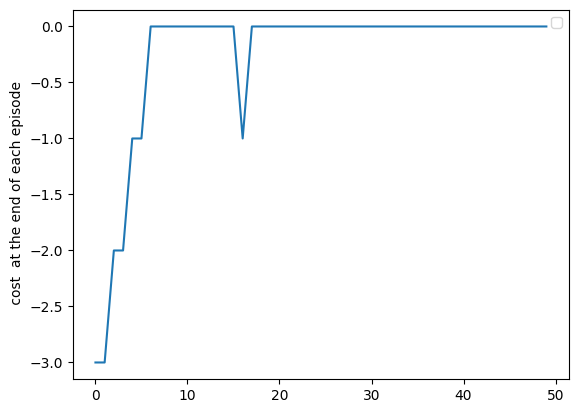

In [4]:
results_small, max_cost, best_itinerary = env_small.train_model(50)

print(f"Maximum cost: {max_cost}")
for train, itinerary in best_itinerary.items():
    print(f"The Train {train} is associated with the itinerary {itinerary}")
plt.plot(results_small)
plt.ylabel(" cost  at the end of each episode")
plt.legend()
plt.show()

## 2.2 Inst_A

In [5]:
env_A = Environnment('instances/inst_A.json')
env_A.print_env()

   id  sensDepart voieEnLigne voieAQuai typeCirculation            dateHeure  \
0   0           0        V1_N        V1            FRET     2021-04-11T05:08   
1   3           1        V2_N         3             TER     2021-04-11T06:11   
2   4           0       VU1_S         Z             TER  2021-04-11T06:14:30   
3   7           1        V1_S         Z             TER     2021-04-11T06:44   
4   9           1        V2_N        V2            FRET     2021-04-11T07:01   

  typesMateriels  
0            [1]  
1            [0]  
2            [0]  
3            [0]  
4            [1]  
0      0
1      3
2      4
3      7
4      9
5     10
6     12
7     14
8     20
9     24
10    18
11    19
12    23
13    25
14    28
15    29
16    36
17    43
18    33
19    37
20    41
21    39
22    42
23    46
24    48
25    50
26    54
27    56
28    60
29    61
30    62
31    69
32    68
33    70
34    72
35    73
36    74
37    77
38    80
39    81
40    84
41    86
42    88
43    91
44    92


Maximum cost: -0.0
The Train 0 is associated with the itinerary 14
The Train 3 is associated with the itinerary 11
The Train 4 is associated with the itinerary 134
The Train 7 is associated with the itinerary 2
The Train 9 is associated with the itinerary 11
The Train 10 is associated with the itinerary 14
The Train 12 is associated with the itinerary 60
The Train 14 is associated with the itinerary 60
The Train 20 is associated with the itinerary 0
The Train 24 is associated with the itinerary 60
The Train 18 is associated with the itinerary 72
The Train 19 is associated with the itinerary 95
The Train 23 is associated with the itinerary 67
The Train 25 is associated with the itinerary 14
The Train 28 is associated with the itinerary 2
The Train 29 is associated with the itinerary 14
The Train 36 is associated with the itinerary 5
The Train 43 is associated with the itinerary 60
The Train 33 is associated with the itinerary 79
The Train 37 is associated with the itinerary 70
The Train

/var/folders/br/9496lc214557xl6c9pv6n2qr0000gn/T/ipykernel_47547/2285030894.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


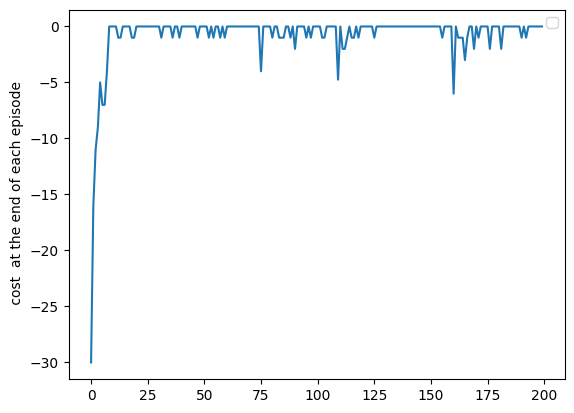

In [6]:
results_A, max_cost, best_itinerary = env_A.train_model(200)

print(f"Maximum cost: {max_cost}")
for train, itinerary in best_itinerary.items():
    print(f"The Train {train} is associated with the itinerary {itinerary}")
plt.plot(results_A)
plt.ylabel(" cost  at the end of each episode")
plt.legend()
plt.show()

## 2.3 Inst_NS
The data set is quite large and take around 10 minutes to terminate.

In [8]:
env_NS = Environnment('instances/inst_NS.json')
env_NS.print_env()

   id  sensDepart voieEnLigne voieAQuai typeCirculation         dateHeure  \
0   0           1          DS         2            TECH  2021-04-11T00:10   
1   7           1          VM        53            TECH  2021-04-11T04:30   
2   8           1          DL        55            TECH  2021-04-11T04:35   
3  15           1          DL        54            TECH  2021-04-11T05:05   
4  26           1          GL        52            TECH  2021-04-11T05:52   

  typesMateriels  
0            [2]  
1           [52]  
2           [40]  
3           [40]  
4            [5]  
0        0
1        7
2        8
3       15
4       26
      ... 
338    692
339    695
340    698
341    699
342    702
Name: id, Length: 343, dtype: int64
the state space (les id des trains) None


Maximum cost: -0.0
The Train 0 is associated with the itinerary 455
The Train 7 is associated with the itinerary 893
The Train 8 is associated with the itinerary 424
The Train 15 is associated with the itinerary 424
The Train 26 is associated with the itinerary 470
The Train 32 is associated with the itinerary 386
The Train 1 is associated with the itinerary 37
The Train 3 is associated with the itinerary 37
The Train 5 is associated with the itinerary 456
The Train 13 is associated with the itinerary 387
The Train 9 is associated with the itinerary 2
The Train 11 is associated with the itinerary 423
The Train 16 is associated with the itinerary 0
The Train 57 is associated with the itinerary 388
The Train 18 is associated with the itinerary 563
The Train 20 is associated with the itinerary 857
The Train 22 is associated with the itinerary 3
The Train 24 is associated with the itinerary 4
The Train 25 is associated with the itinerary 5
The Train 73 is associated with the itinerary 393


/var/folders/br/9496lc214557xl6c9pv6n2qr0000gn/T/ipykernel_47547/2975938966.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


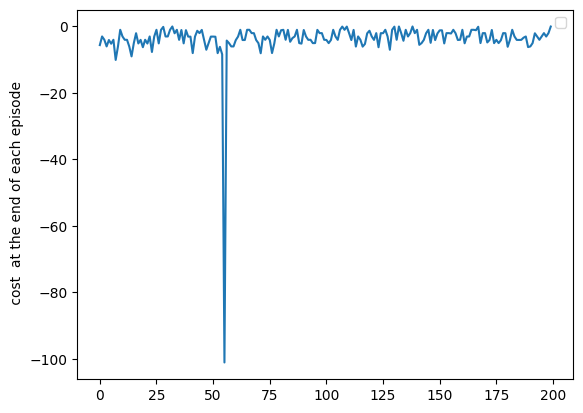

In [10]:
results_NS, max_cost, best_itinerary = env_NS.train_model(200)

print(f"Maximum cost: {max_cost}")
for train, itinerary in best_itinerary.items():
    print(f"The Train {train} is associated with the itinerary {itinerary}")
plt.plot(results_NS)
plt.ylabel(" cost  at the end of each episode")
plt.legend()
plt.show()

## 2.4 Inst_PMP 
This time with a lot more contraints on the materials and eletrical power. The program takes around 20 minutes to terminate.

In [12]:
env_PMP = Environnment('instances/inst_PMP.json')
env_PMP.print_env()

   id  sensDepart voieEnLigne voieAQuai typeCirculation         dateHeure  \
0   0           1          V1        19             TER  2021-04-11T00:02   
1   2           1         V1B        10              TN  2021-04-11T00:05   
2  16           1         V1B        11              TN  2021-04-11T01:05   
3  19           1         GV1         4            TECH  2021-04-11T03:57   
4  24           1         GV1         7            TECH  2021-04-11T04:44   

  typesMateriels  
0           [11]  
1            [3]  
2           [10]  
3            [6]  
4            [7]  
0        0
1        2
2       16
3       19
4       24
      ... 
310    619
311    620
312    627
313    623
314    628
Name: id, Length: 315, dtype: int64
the state space (les id des trains) None


Here we train using more episodes because there is much more constraints in the data , meaning we need more exploration in order to achieve an optimal planification.

Maximum cost: -0.0
The Train 0 is associated with the itinerary 18
The Train 2 is associated with the itinerary 0
The Train 16 is associated with the itinerary 0
The Train 19 is associated with the itinerary 11
The Train 24 is associated with the itinerary 11
The Train 33 is associated with the itinerary 18
The Train 34 is associated with the itinerary 0
The Train 35 is associated with the itinerary 486
The Train 42 is associated with the itinerary 1
The Train 44 is associated with the itinerary 1
The Train 45 is associated with the itinerary 21
The Train 51 is associated with the itinerary 0
The Train 82 is associated with the itinerary 21
The Train 88 is associated with the itinerary 1
The Train 74 is associated with the itinerary 21
The Train 7 is associated with the itinerary 9
The Train 5 is associated with the itinerary 487
The Train 6 is associated with the itinerary 313
The Train 9 is associated with the itinerary 491
The Train 15 is associated with the itinerary 9
The Train 28

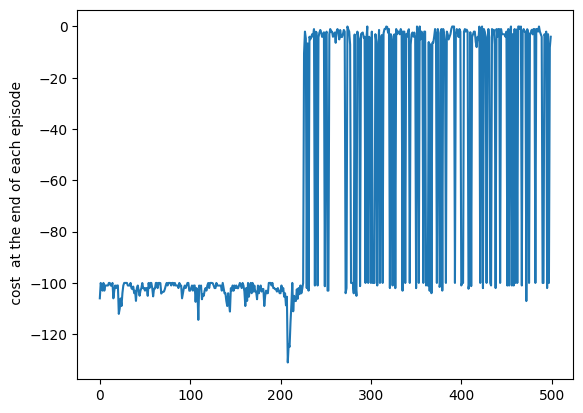

In [14]:
results_PMP, max_cost, best_itinerary = env_PMP.train_model(500)

print(f"Maximum cost: {max_cost}")
for train, itinerary in best_itinerary.items():
    print(f"The Train {train} is associated with the itinerary {itinerary}")
plt.plot(results_PMP)
plt.ylabel(" cost  at the end of each episode")
plt.show()

## 2.5 Inst_PE  
Much bigger in terms of memory space and data. We can see here the **limitations of the tabular approach** for this problem as the computation time is much longer. a complete run takes between 30 to 60 min depending on the machine you use.

In [16]:
env_PE = Environnment('instances/inst_PE.json')
env_PE.print_env()

train sans action space id                              461
sensDepart                        0
voieEnLigne                     v1T
voieAQuai                       ETU
typeCirculation                TECH
dateHeure          2021-04-11T19:46
typesMateriels                 [44]
Name: 227, dtype: object
   id  sensDepart voieEnLigne voieAQuai typeCirculation            dateHeure  \
0   0           1         v1B        17              TN     2021-04-11T00:01   
1   2           1         v1B        13              TN     2021-04-11T00:31   
2  22           1          vM        18              TN     2021-04-11T06:01   
3  33           1          vM        20              TN     2021-04-11T06:31   
4  24           0          v2        22              TN  2021-04-11T06:09:30   

  typesMateriels  
0           [62]  
1           [62]  
2       [62, 62]  
3       [62, 62]  
4            [5]  
0        0
1        2
2       22
3       33
4       24
      ... 
260    539
261    542
262    545
263  

In [ ]:
results_PE, max_cost, best_itinerary = env_PE.train_model(100)

Maximum cost: -70.76400000000001
The Train 0 is associated with the itinerary 3
The Train 2 is associated with the itinerary 1026
The Train 22 is associated with the itinerary 701
The Train 33 is associated with the itinerary 701
The Train 24 is associated with the itinerary 2
The Train 6 is associated with the itinerary 15
The Train 4 is associated with the itinerary 3
The Train 5 is associated with the itinerary 9
The Train 7 is associated with the itinerary 21
The Train 8 is associated with the itinerary 52
The Train 9 is associated with the itinerary 72
The Train 10 is associated with the itinerary 8
The Train 20 is associated with the itinerary 25
The Train 15 is associated with the itinerary 8
The Train 28 is associated with the itinerary 86
The Train 37 is associated with the itinerary 114
The Train 29 is associated with the itinerary 897
The Train 21 is associated with the itinerary 24
The Train 39 is associated with the itinerary 247
The Train 26 is associated with the itinera

/var/folders/br/9496lc214557xl6c9pv6n2qr0000gn/T/ipykernel_47547/2237030557.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


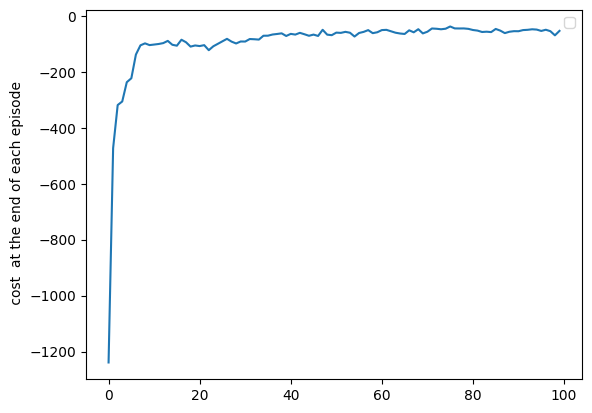

In [18]:
print(f"Maximum cost: {max_cost}")
for train, itinerary in best_itinerary.items():
    print(f"The Train {train} is associated with the itinerary {itinerary}")
plt.plot(results_PE)
plt.ylabel(" cost  at the end of each episode")
plt.legend()
plt.show()